<img src='images/quora-2.png'/>

<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs Similarity </h1>

# Contents:
[1.Business Problem](#business) <br>
- [1.1 Description](#description) <br>
- [1.2 Sources/Useful Links](#links) <br>
- [1.3 Real world/Business Objectives and Constraints](#real) <br>

[2. Machine Learning Problem](#ml) <br>
- [2.1 Data](#data) <br>
  - [2.1.1 Data Overview](#overview) <br>
  - [2.1.1 Example Data point](#example) <br>
- [2.2 Mapping the real world problem to an ML problem](#map) <br>
  - [2.2.1 Type of Machine Learning Problem](#type) <br>
  - [2.2.2 Performance Metric](#metric) <br>
- [2.3 Train and Test Construction](#train) <br>

[3. Exploratory Data Analysis](#analysis)<br>
- [3.1 Reading data and basic stats](#stats)<br>
- [3.2 Basic Analysis](#basic)<br>
  - [3.2.1 Distribution of data points among output classes](#distribution) <br>
  - [3.2.2 Number of unique questions](#unique) <br>
  - [3.2.3 Checking for Duplicates](#dup) <br>
  - [3.2.4 Number of occurrences of each question](#occur) <br>
  - [3.2.5 Checking for NULL values](#null) <br>
- [3.3 Basic Feature Extraction (before cleaning)](#feature) <br>
  - [3.3.1 Analysis of some of the extracted features](#some) <br>
    - [3.3.1.1 Feature: word_share](#share) <br>
    - [3.3.1.2 Feature: word_Common](#common) <br>
    - [3.3.1.3 : EDA: Advanced Feature Extraction](#eda) <br>
- [3.4 Preprocessing of Text](#text) <br>
- [3.5 Advanced Feature Extraction (NLP and Fuzzy Features)](#adv) <br>
  - [3.5.1 Analysis of extracted features](#aef) <br>
    - [3.5.1.1 Plotting Word clouds](#cloud) <br>
    - [3.5.1.2 Pair plot of features 'ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'](#pair) <br>
  - [3.5.2 Visualization](#vis) <br>
- [3.6 Featurizing text data with tfidf](#tfidf) <br>
- [3.7 Dividing data into train and test](#div) <br>

[4. Machine Learning Models](#models) <br>
  - [4.1 Building a random model (Finding worst-case log-loss)](#random) <br>
  - [4.2 Logistic Regression with hyperparameter tuning](#log) <br>
  - [4.3 Linear SVM with hyperparameter tuning](#svm) <br>
  - [4.4 Naive Bayes with hyperparameter tuning](#naive) <br>
  - [4.5 XGBoost with hyperparameter tuning](#xgb) <br>

[5. Conclusion](#con) <br>  

<a id='business'></a>
<h1> 1. Business Problem </h1>

<a id='description'></a>
<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<a id='links'></a>
<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<a id='real'></a>
<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<a id='ml'></a>
<h1>2. Machine Learning Problem </h1>


<a id='data'></a><h2> 2.1 Data </h2>

<a id='overview'></a>
<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<a id='example'></a>
<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<a id='map'></a>
<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<a id='type'></a>
<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<a id='metric'></a>
<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<a id='train'></a>
<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<a id='analysis'></a>
<h1>3. Exploratory Data Analysis </h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import scipy
from scipy.sparse import csr_matrix, hstack
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
from datetime import datetime

warnings.filterwarnings("ignore")

<a id='stats'></a>
<h2> 3.1 Reading data and basic stats </h2>

In [2]:
df = pd.read_csv("train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<a id='basic'></a>
<h2> 3.2 Basic Analysis</h2>

<a id='distribution'></a>
<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

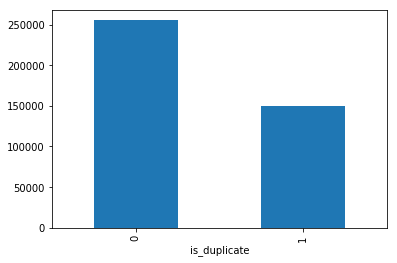

In [5]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [6]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   404290


In [7]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


In [8]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

In [9]:
qids.head()

0    1
1    3
2    5
3    7
4    9
dtype: int64

<a id='unique'></a>
<h3> 3.2.2 Number of unique questions </h3>

In [10]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



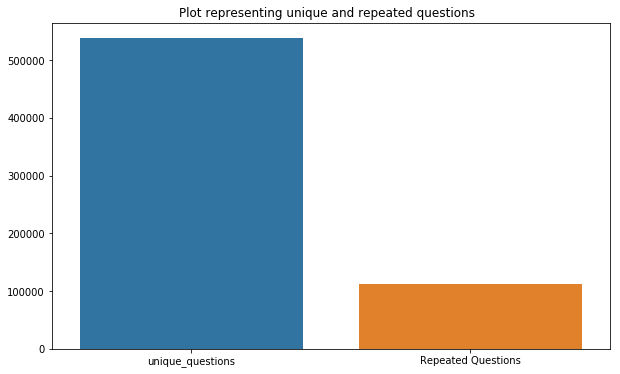

In [11]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

<a id='dup'></a>
<h3>3.2.3 Checking for Duplicates </h3>

In [12]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


<a id='occur'></a>
<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 157



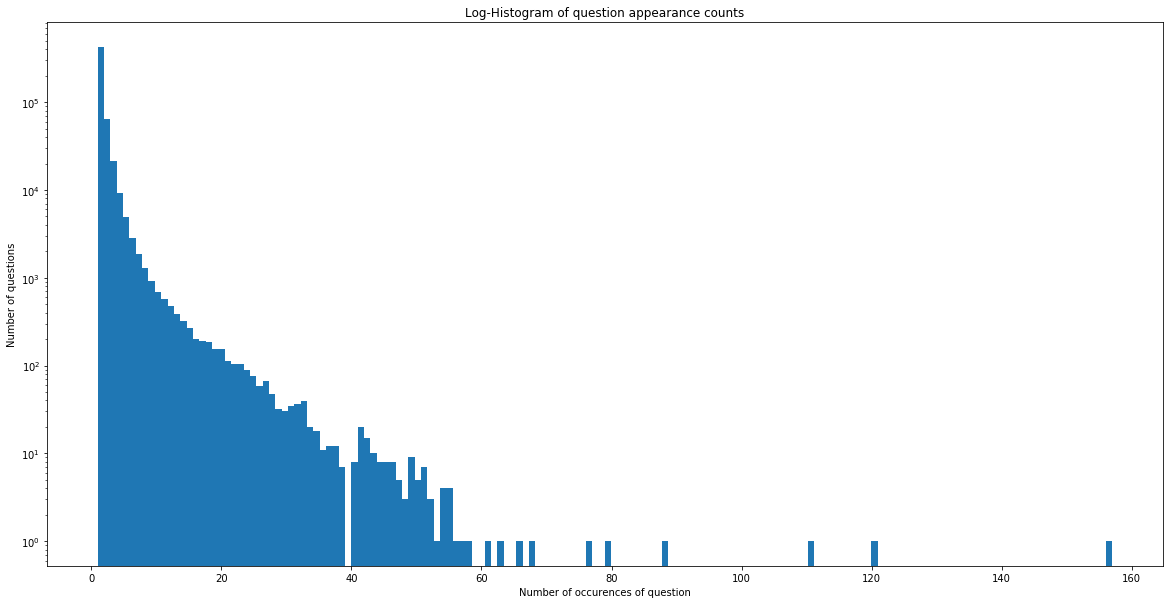

In [13]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

<a id='null'></a>
<h3> 3.2.5 Checking for NULL values </h3>

In [14]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1 question2  \
105780  105780  174363  174364    How can I develop android app?       NaN   
201841  201841  303951  174364  How can I create an Android app?       NaN   

        is_duplicate  
105780             0  
201841             0  


- There are two rows with null values in question2 

In [15]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<a id='feature'></a>
<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [16]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


<a id='some'></a>
<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [17]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== min(df['q1_n_words'])].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== min(df['q2_n_words'])].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


<a id='share'></a>
<h4> 3.3.1.1 Feature: word_share </h4>

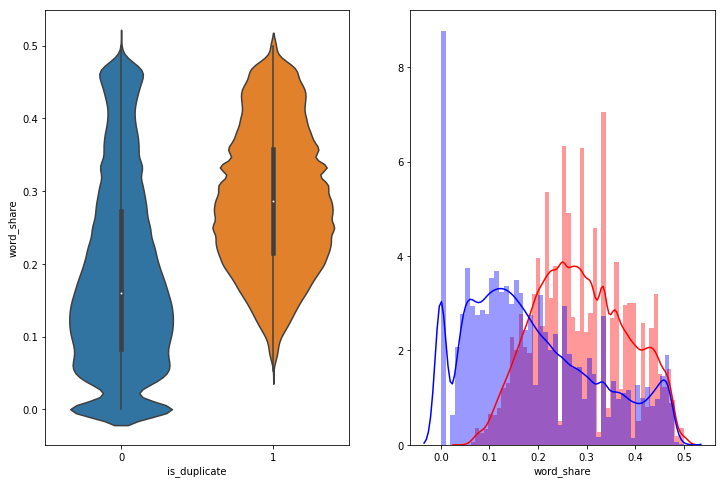

In [18]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<a id='common'> </a>
<h4> 3.3.1.2 Feature: word_Common </h4>

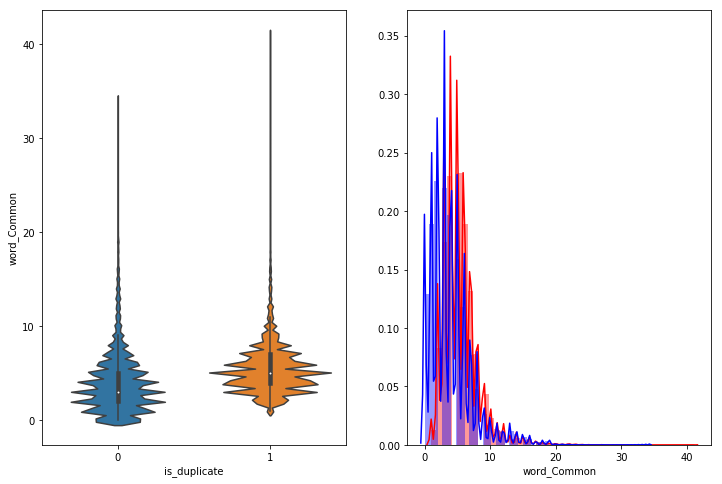

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping </p>

<a id='eda'></a>
### 3.3.1.3 : EDA: Advanced Feature Extraction.

In [20]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [21]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


<a id='text'></a>
<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [22]:
# To get the results in 4 decimal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

<a id='adv'></a>
<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [23]:

def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [24]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


<a id='aef'></a>
<h3>3.5.1 Analysis of extracted features </h3>

<a id='cloud'> </a>
<h4> 3.5.1.1 Plotting Word clouds</h4>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [25]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s',encoding="utf8")
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s',encoding="utf8")

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [26]:
# reading the text files and removing the Stop Words:
from nltk.corpus import stopwords
d = os.path.dirname('.')

textp_w = open(os.path.join(d, 'train_p.txt'),encoding = 'utf-8').read()
textn_w = open(os.path.join(d, 'train_n.txt'),encoding = 'utf-8').read()
stopwords = set(STOPWORDS)

stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")

stopwords.remove("not")
stopwords.remove("no")
stopwords.remove("like")

print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 33193130


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


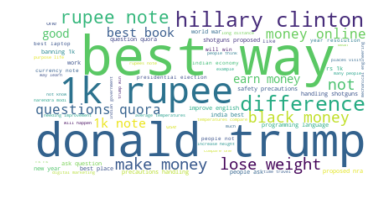

In [27]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


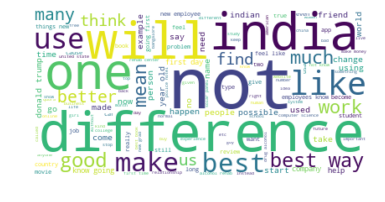

In [28]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id='pair'></a>
<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

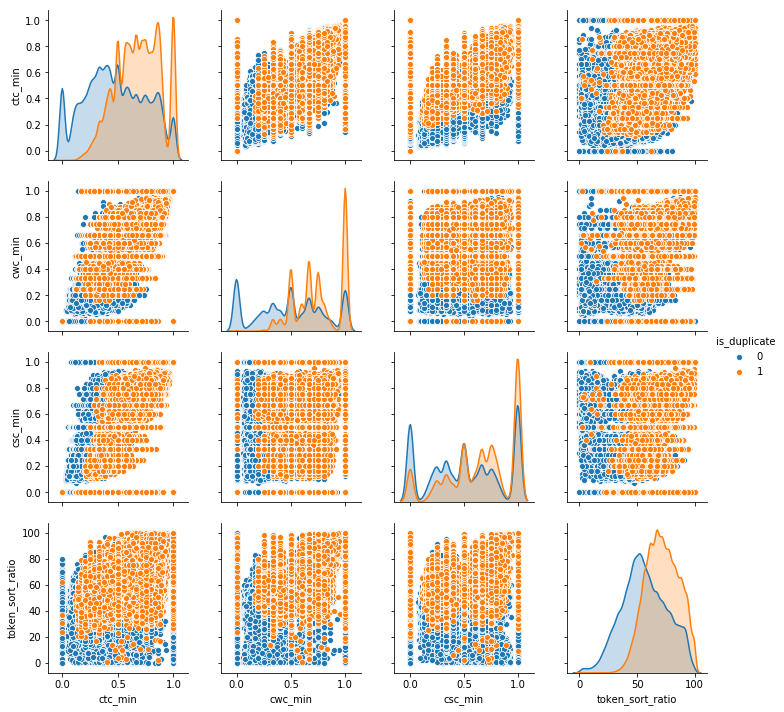

In [30]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

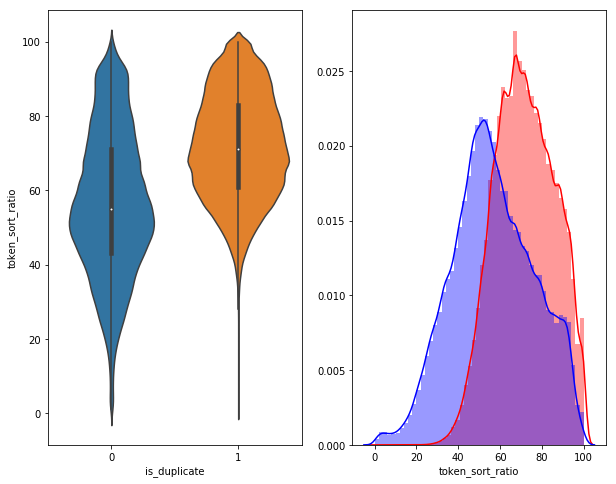

In [31]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

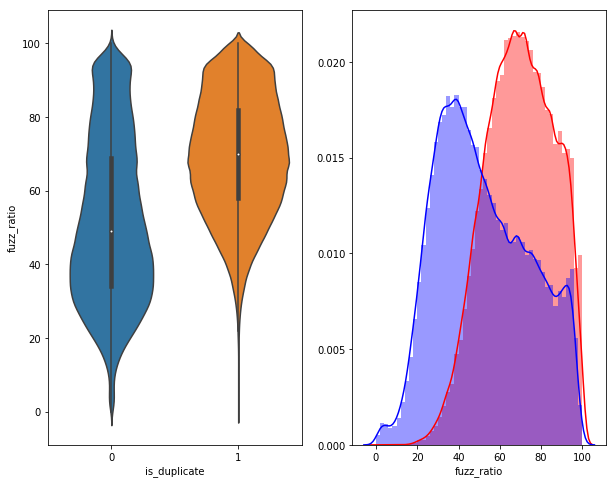

In [32]:
# Distribution of the fuzz_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

<a id='vis'></a>
<h3>3.5.2 Visualization </h3>

In [33]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [34]:
from sklearn.manifold import TSNE
tsne2d = TSNE(
    n_components=2,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.023s...
[t-SNE] Computed neighbors for 5000 samples in 0.830s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.466s
[t-SNE] Iteration 50: error = 81.2897949, gradient norm = 0.0455700 (50 iterations in 15.089s)
[t-SNE] Iteration 100: error = 70.6164398, gradient norm = 0.0095177 (50 iterations in 12.183s)
[t-SNE] Iteration 150: error = 68.9172134, gradient norm = 0.0056736 (50 iterations in 11.599s)
[t-SNE] Iteration 200: error = 68.1004639, gradient norm = 0.0049672 (50 iterations in 12.091s)
[t-SNE] Iteration 250: error = 67.5914536, gradient norm = 0.003

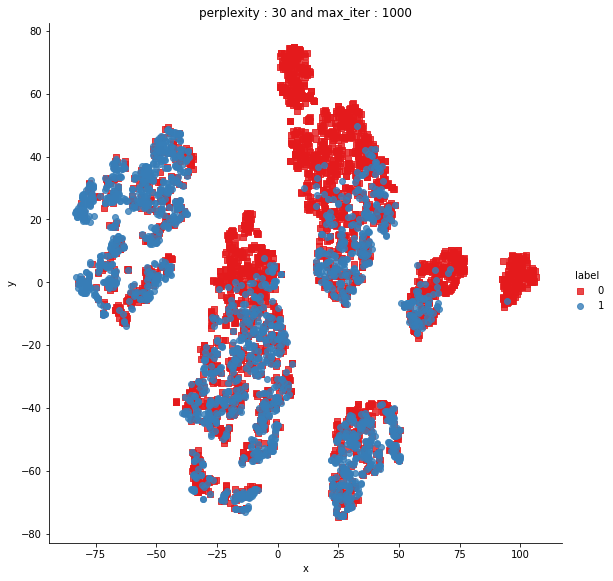

In [35]:
df_x = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df_x, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [36]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.024s...
[t-SNE] Computed neighbors for 5000 samples in 0.813s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.445s
[t-SNE] Iteration 50: error = 80.5298615, gradient norm = 0.0306586 (50 iterations in 29.656s)
[t-SNE] Iteration 100: error = 69.3777008, gradient norm = 0.0037944 (50 iterations in 14.862s)
[t-SNE] Iteration 150: error = 67.9726028, gradient norm = 0.0017517 (50 iterations in 13.907s)
[t-SNE] Iteration 200: error = 67.4098892, gradient norm = 0.0013384 (50 iterations in 13.963s)
[t-SNE] Iteration 250: error = 67.0977859, gradient norm = 0.000

In [37]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

<a id='tfidf'></a>
<h2> 3.6 Featurizing text data with tfidf </h2>

In [41]:
# Getting data that are already processed
if os.path.isfile('nlp_features_train.csv'):
    df_nlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df_pre = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [80]:
#Conacting features from nlp_features_train, df_fe_without_preprocessing_train
df_pre = df_pre.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

df_total = pd.concat([df_nlp,df_pre],axis =1)

In [99]:
# Casting questions to string type and filling missing values
df_total['question1'] = df_total['question1'].apply(lambda x: str(x))
df_total['question2'] = df_total['question2'].apply(lambda x: str(x))

df = df.fillna('')

In [101]:
#Seperating data into input features and target feature
y_true = df_total['is_duplicate'].values
X = df_total.drop(['is_duplicate'], axis = 1)

<a id='div'></a>
<h3> 3.7 Dividing data into train and test </h3>

In [104]:
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y_true, stratify=y_true, test_size=0.3)

In [108]:
# Transforming text questions into TF-IDF representation 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect1 = TfidfVectorizer(max_features=20000)
tfidf_vect1.fit(X_train['question1'])
X_train_q1 = tfidf_vect1.transform(X_train['question1'])
X_test_q1 = tfidf_vect1.transform(X_test['question1'])

tfidf_vect2 = TfidfVectorizer(max_features=20000)
tfidf_vect2.fit(X_train['question2'])
X_train_q2 = tfidf_vect2.transform(X_train['question2'])
X_test_q2 = tfidf_vect2.transform(X_test['question2'])

In [116]:
# Dropping extra columns
X_train = X_train.drop(['id','qid1','qid2','question1','question2'], axis = 1)
X_test = X_test.drop(['id','qid1','qid2','question1','question2'], axis = 1)

In [134]:
# Converting data into sparse matrix
X_train_csr = scipy.sparse.csr_matrix(X_train)
X_test_csr = scipy.sparse.csr_matrix(X_test)

X_train_q12 = scipy.sparse.hstack((X_train_q1,X_train_q2))
X_train = scipy.sparse.hstack((X_train_q12,X_train_csr))

X_test_q12 = scipy.sparse.hstack((X_test_q1,X_test_q2))
X_test = scipy.sparse.hstack((X_test_q12,X_test_csr))

print('The shape of final train data :', X_train.shape)
print('The shape of final test data :', X_test.shape)

The shape of final train data : (283003, 80026)
The shape of final test data : (121287, 80026)


In [126]:
# Distribution of target variable
from collections import Counter
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308025003268517 Class 1:  0.36919749967314835
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


<a id='models'> </a>
<h2>4. Machine Learning Models </h2>

In [131]:
# This function plots the confusion,Recall,Precision matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    
    # Confusion matrix
    C = confusion_matrix(test_y, predict_y)
    
    # Recall matrix
    A =(((C.T)/(C.sum(axis=1))).T)
    
    # Precision matrix
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt = ".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<a id='random'></a>
<h2> 4.1 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8865515340377276


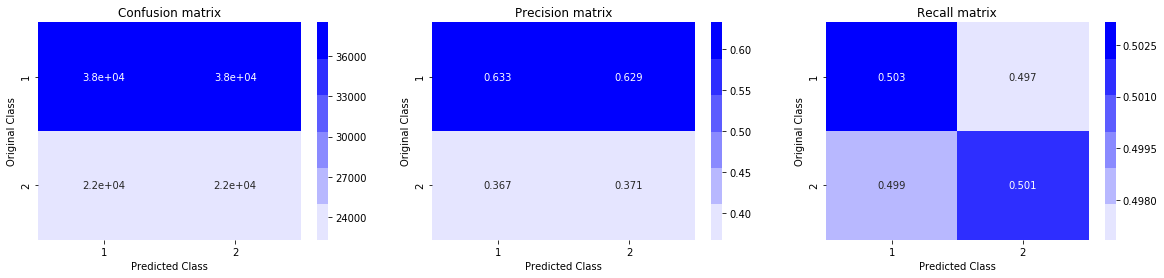

In [132]:
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<a id='log'></a>
<h2> 4.2 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.44257056708140113
For values of alpha =  0.0001 The log loss is: 0.44063386963980883
For values of alpha =  0.001 The log loss is: 0.4396050349390498
For values of alpha =  0.01 The log loss is: 0.4487273364901299
For values of alpha =  0.1 The log loss is: 0.4642019347833796
For values of alpha =  1 The log loss is: 0.4941942637748808
For values of alpha =  10 The log loss is: 0.5415611903312473


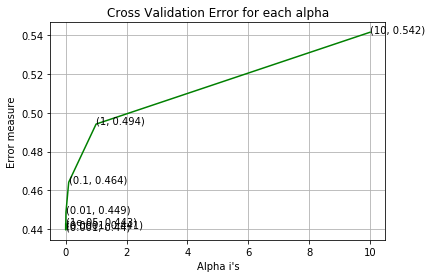

For values of best alpha =  0.001 The train log loss is: 0.44093832118942444
For values of best alpha =  0.001 The test log loss is: 0.4396050349390498
Total number of data points : 121287


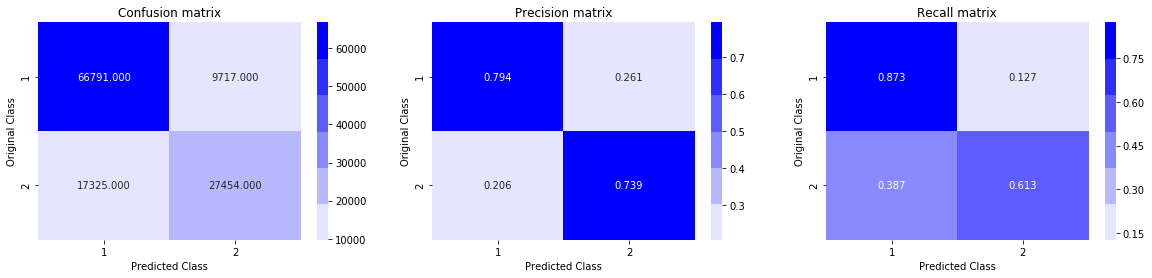

In [129]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, auc, roc_curve


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<a id='svm'></a>
<h2> 4.3 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.44390975428187746
For values of alpha =  0.0001 The log loss is: 0.44283573592738285
For values of alpha =  0.001 The log loss is: 0.4391588656968511
For values of alpha =  0.01 The log loss is: 0.4492881203963018
For values of alpha =  0.1 The log loss is: 0.45942277736567894
For values of alpha =  1 The log loss is: 0.4868962503809062
For values of alpha =  10 The log loss is: 0.537445478762965


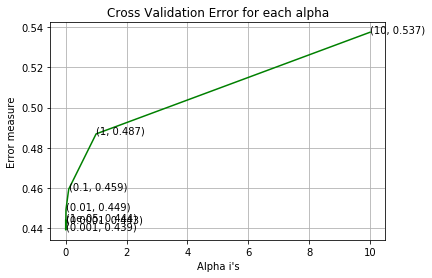

For values of best alpha =  0.001 The train log loss is: 0.44093832118942444
For values of best alpha =  0.001 The test log loss is: 0.4396050349390498
Total number of data points : 121287


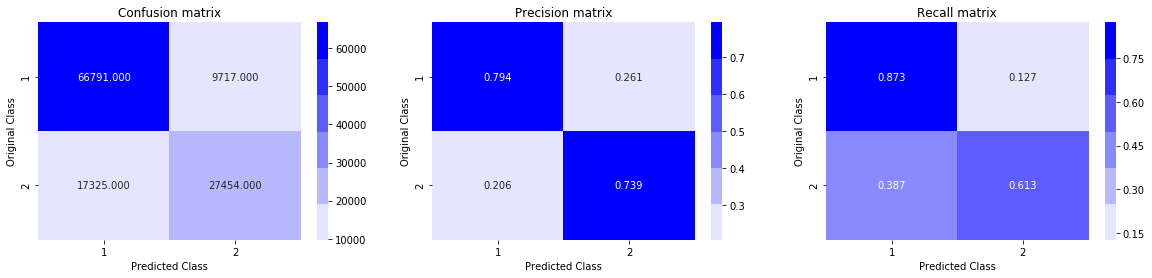

In [130]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.



log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<a id='naive'> </a>
<h2> 4.4 Naive Bayes with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5496047006630099
For values of alpha =  0.0001 The log loss is: 0.5500806450685414
For values of alpha =  0.001 The log loss is: 0.5510140349277418
For values of alpha =  0.01 The log loss is: 0.5525914223397491
For values of alpha =  0.1 The log loss is: 0.5548274771542812
For values of alpha =  1 The log loss is: 0.5582226388635247
For values of alpha =  10 The log loss is: 0.5654530614765012


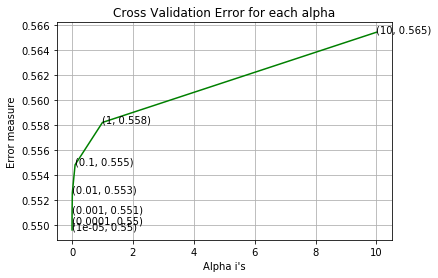

For values of best alpha =  1e-05 The train log loss is: 0.5402840644300267
For values of best alpha =  1e-05 The test log loss is: 0.5496047006630099
Total number of data points : 121287


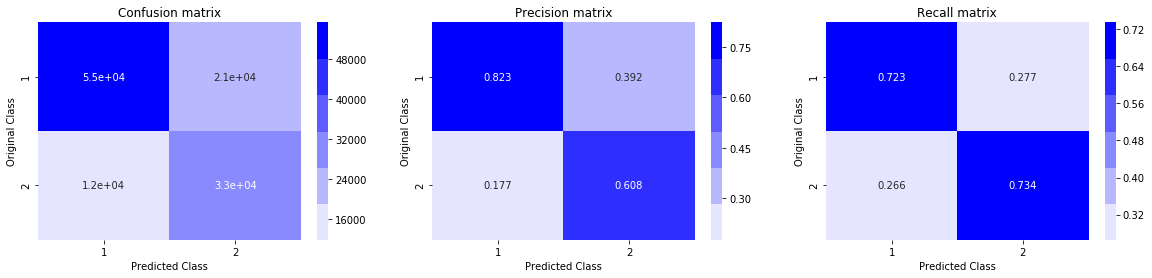

In [147]:
alpha = [10 ** x for x in range(-5, 2)] 

log_error_array=[]
for i in alpha:
    clf = MultinomialNB(alpha=i)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<a id='xgb'></a>
<h2> 4.5 XGboost with hyperparameter training </h2>

In [136]:
# parameters initialization for XGB classifier
param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [1.0, 3.0, 5.0, 7.0],
        'gamma': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        }
fit_params = {'eval_metric': 'logloss',
              'early_stopping_rounds': 10,
              'eval_set': [(X_train, y_train)]
              }

clf = xgb.XGBClassifier()

In [138]:
# Finding best parameters using Randomsearch cv
rs_xgb_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            fit_params=fit_params,
                            scoring='neg_log_loss', refit=False, random_state=42)

rs_xgb_clf.fit(X_train, y_train)


Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=0.7, reg_lambda=50.0, min_child_weight=7.0, max_depth=3, learning_rate=0.001, gamma=1.0, colsample_bytree=0.8, colsample_bylevel=0.7 
[0]	validation_0-logloss:0.692777
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.692409
[2]	validation_0-logloss:0.692026
[3]	validation_0-logloss:0.691699
[4]	validation_0-logloss:0.691317
[5]	validation_0-logloss:0.690962
[6]	validation_0-logloss:0.690603
[7]	validation_0-logloss:0.690243
[8]	validation_0-logloss:0.689876
[9]	validation_0-logloss:0.689511
[10]	validation_0-logloss:0.689163
[11]	validation_0-logloss:0.688827
[12]	validation_0-logloss:0.688503
[13]	validation_0-logloss:0.688122
[14]	validation_0-logloss:0.687761
[15]	validation_0-logloss:0.687434
[16]	validation_0-logloss:0.687059
[17]	validation_0-logloss:0.686693
[18]	validation_0-logloss:0.686349
[19]	validation_0-logloss:0.686007
[20]	validation_0-logloss:0.6856

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[0]	validation_0-logloss:0.692777
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.692416
[2]	validation_0-logloss:0.692055
[3]	validation_0-logloss:0.691685
[4]	validation_0-logloss:0.691323
[5]	validation_0-logloss:0.690958
[6]	validation_0-logloss:0.690596
[7]	validation_0-logloss:0.690311
[8]	validation_0-logloss:0.689979
[9]	validation_0-logloss:0.689613
[10]	validation_0-logloss:0.689235
[11]	validation_0-logloss:0.68888
[12]	validation_0-logloss:0.688531
[13]	validation_0-logloss:0.688179
[14]	validation_0-logloss:0.687816
[15]	validation_0-logloss:0.687471
[16]	validation_0-logloss:0.687115
[17]	validation_0-logloss:0.686761
[18]	validation_0-logloss:0.686411
[19]	validation_0-logloss:0.686069
[20]	validation_0-logloss:0.685693
[21]	validation_0-logloss:0.68532
[22]	validation_0-logloss:0.68499
[23]	validation_0-logloss:0.684648
[24]	validation_0-logloss:0.684274
[25]	validation_0-logloss:0.683903
[26]	validation_0-logloss:0.683581


[12]	validation_0-logloss:0.36725
[13]	validation_0-logloss:0.36287
[14]	validation_0-logloss:0.360025
[15]	validation_0-logloss:0.356723
[16]	validation_0-logloss:0.35506
[17]	validation_0-logloss:0.353368
[18]	validation_0-logloss:0.351026
[19]	validation_0-logloss:0.349964
[20]	validation_0-logloss:0.34817
[21]	validation_0-logloss:0.346353
[22]	validation_0-logloss:0.345135
[23]	validation_0-logloss:0.344203
[24]	validation_0-logloss:0.34277
[25]	validation_0-logloss:0.341675
[26]	validation_0-logloss:0.34068
[27]	validation_0-logloss:0.339512
[28]	validation_0-logloss:0.337977
[29]	validation_0-logloss:0.337393
[30]	validation_0-logloss:0.336005
[31]	validation_0-logloss:0.33562
[32]	validation_0-logloss:0.335209
[33]	validation_0-logloss:0.334101
[34]	validation_0-logloss:0.333589
[35]	validation_0-logloss:0.333203
[36]	validation_0-logloss:0.332729
[37]	validation_0-logloss:0.332411
[38]	validation_0-logloss:0.33177
[39]	validation_0-logloss:0.331409
[40]	validation_0-logloss:0.

[91]	validation_0-logloss:0.652261
[92]	validation_0-logloss:0.651852
[93]	validation_0-logloss:0.651441
[94]	validation_0-logloss:0.65103
[95]	validation_0-logloss:0.650621
[96]	validation_0-logloss:0.650213
[97]	validation_0-logloss:0.649806
[98]	validation_0-logloss:0.649399
[99]	validation_0-logloss:0.649003
[CV]  subsample=0.5, reg_lambda=1.0, min_child_weight=5.0, max_depth=7, learning_rate=0.001, gamma=0.7, colsample_bytree=0.9, colsample_bylevel=1.0, total= 5.8min
[CV] subsample=0.5, reg_lambda=1.0, min_child_weight=5.0, max_depth=7, learning_rate=0.001, gamma=0.7, colsample_bytree=0.9, colsample_bylevel=1.0 
[0]	validation_0-logloss:0.692661
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.692172
[2]	validation_0-logloss:0.69169
[3]	validation_0-logloss:0.691211
[4]	validation_0-logloss:0.690725
[5]	validation_0-logloss:0.690238
[6]	validation_0-logloss:0.689752
[7]	validation_0-logloss:0.689273
[8]	validation_0-logloss:0.688791
[9

[60]	validation_0-logloss:0.528935
[61]	validation_0-logloss:0.527293
[62]	validation_0-logloss:0.525539
[63]	validation_0-logloss:0.523774
[64]	validation_0-logloss:0.522215
[65]	validation_0-logloss:0.520628
[66]	validation_0-logloss:0.519079
[67]	validation_0-logloss:0.517571
[68]	validation_0-logloss:0.516081
[69]	validation_0-logloss:0.514559
[70]	validation_0-logloss:0.512921
[71]	validation_0-logloss:0.511334
[72]	validation_0-logloss:0.509954
[73]	validation_0-logloss:0.508465
[74]	validation_0-logloss:0.50706
[75]	validation_0-logloss:0.50551
[76]	validation_0-logloss:0.503975
[77]	validation_0-logloss:0.502604
[78]	validation_0-logloss:0.501179
[79]	validation_0-logloss:0.499799
[80]	validation_0-logloss:0.498373
[81]	validation_0-logloss:0.496956
[82]	validation_0-logloss:0.495559
[83]	validation_0-logloss:0.494327
[84]	validation_0-logloss:0.492966
[85]	validation_0-logloss:0.491766
[86]	validation_0-logloss:0.490473
[87]	validation_0-logloss:0.489176
[88]	validation_0-logl

[74]	validation_0-logloss:0.351081
[75]	validation_0-logloss:0.350935
[76]	validation_0-logloss:0.350711
[77]	validation_0-logloss:0.350176
[78]	validation_0-logloss:0.349981
[79]	validation_0-logloss:0.349757
[80]	validation_0-logloss:0.349631
[81]	validation_0-logloss:0.349446
[82]	validation_0-logloss:0.349234
[83]	validation_0-logloss:0.348927
[84]	validation_0-logloss:0.348684
[85]	validation_0-logloss:0.348327
[86]	validation_0-logloss:0.348047
[87]	validation_0-logloss:0.347539
[88]	validation_0-logloss:0.347338
[89]	validation_0-logloss:0.347166
[90]	validation_0-logloss:0.347001
[91]	validation_0-logloss:0.346872
[92]	validation_0-logloss:0.346401
[93]	validation_0-logloss:0.346085
[94]	validation_0-logloss:0.345559
[95]	validation_0-logloss:0.345347
[96]	validation_0-logloss:0.344882
[97]	validation_0-logloss:0.34462
[98]	validation_0-logloss:0.344466
[99]	validation_0-logloss:0.344209
[CV]  subsample=0.5, reg_lambda=0.1, min_child_weight=7.0, max_depth=3, learning_rate=0.2, 

[88]	validation_0-logloss:0.506834
[89]	validation_0-logloss:0.505707
[90]	validation_0-logloss:0.504669
[91]	validation_0-logloss:0.503582
[92]	validation_0-logloss:0.502486
[93]	validation_0-logloss:0.501522
[94]	validation_0-logloss:0.500532
[95]	validation_0-logloss:0.499476
[96]	validation_0-logloss:0.498404
[97]	validation_0-logloss:0.497459
[98]	validation_0-logloss:0.496459
[99]	validation_0-logloss:0.495466
[CV]  subsample=0.9, reg_lambda=50.0, min_child_weight=5.0, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.8, total= 1.6min
[CV] subsample=0.9, reg_lambda=50.0, min_child_weight=5.0, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.8 
[0]	validation_0-logloss:0.689499
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.685887
[2]	validation_0-logloss:0.682134
[3]	validation_0-logloss:0.678457
[4]	validation_0-logloss:0.674829
[5]	validation_0-logloss:0.6713

[0]	validation_0-logloss:0.689462
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.685913
[2]	validation_0-logloss:0.68212
[3]	validation_0-logloss:0.678433
[4]	validation_0-logloss:0.674977
[5]	validation_0-logloss:0.671625
[6]	validation_0-logloss:0.668419
[7]	validation_0-logloss:0.665166
[8]	validation_0-logloss:0.662028
[9]	validation_0-logloss:0.658826
[10]	validation_0-logloss:0.655904
[11]	validation_0-logloss:0.652707
[12]	validation_0-logloss:0.649778
[13]	validation_0-logloss:0.646778
[14]	validation_0-logloss:0.64389
[15]	validation_0-logloss:0.640663
[16]	validation_0-logloss:0.637918
[17]	validation_0-logloss:0.635249
[18]	validation_0-logloss:0.63258
[19]	validation_0-logloss:0.629847
[20]	validation_0-logloss:0.627003
[21]	validation_0-logloss:0.624436
[22]	validation_0-logloss:0.6217
[23]	validation_0-logloss:0.619167
[24]	validation_0-logloss:0.617293
[25]	validation_0-logloss:0.614572
[26]	validation_0-logloss:0.612319
[2

[31]	validation_0-logloss:0.331721
[32]	validation_0-logloss:0.330698
[33]	validation_0-logloss:0.330226
[34]	validation_0-logloss:0.329524
[35]	validation_0-logloss:0.328732
[36]	validation_0-logloss:0.328084
[37]	validation_0-logloss:0.327476
[38]	validation_0-logloss:0.326822
[39]	validation_0-logloss:0.326223
[40]	validation_0-logloss:0.325834
[41]	validation_0-logloss:0.325491
[42]	validation_0-logloss:0.325126
[43]	validation_0-logloss:0.324528
[44]	validation_0-logloss:0.324085
[45]	validation_0-logloss:0.323698
[46]	validation_0-logloss:0.323372
[47]	validation_0-logloss:0.322921
[48]	validation_0-logloss:0.321981
[49]	validation_0-logloss:0.321736
[50]	validation_0-logloss:0.320795
[51]	validation_0-logloss:0.320408
[52]	validation_0-logloss:0.320088
[53]	validation_0-logloss:0.319721
[54]	validation_0-logloss:0.319167
[55]	validation_0-logloss:0.318934
[56]	validation_0-logloss:0.31866
[57]	validation_0-logloss:0.31817
[58]	validation_0-logloss:0.317058
[59]	validation_0-logl

Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.560815
[2]	validation_0-logloss:0.52335
[3]	validation_0-logloss:0.490806
[4]	validation_0-logloss:0.467946
[5]	validation_0-logloss:0.450645
[6]	validation_0-logloss:0.43452
[7]	validation_0-logloss:0.423442
[8]	validation_0-logloss:0.41369
[9]	validation_0-logloss:0.406234
[10]	validation_0-logloss:0.398614
[11]	validation_0-logloss:0.393445
[12]	validation_0-logloss:0.388189
[13]	validation_0-logloss:0.384892
[14]	validation_0-logloss:0.381418
[15]	validation_0-logloss:0.378392
[16]	validation_0-logloss:0.375608
[17]	validation_0-logloss:0.372595
[18]	validation_0-logloss:0.370744
[19]	validation_0-logloss:0.369081
[20]	validation_0-logloss:0.367277
[21]	validation_0-logloss:0.365343
[22]	validation_0-logloss:0.364337
[23]	validation_0-logloss:0.36307
[24]	validation_0-logloss:0.36165
[25]	validation_0-logloss:0.360581
[26]	validation_0-logloss:0.359116
[27]	validation_0-logloss:0.358004
[

[0]	validation_0-logloss:0.693147
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.693147
[2]	validation_0-logloss:0.693147
[3]	validation_0-logloss:0.693147
[4]	validation_0-logloss:0.693147
[5]	validation_0-logloss:0.693147
[6]	validation_0-logloss:0.693147
[7]	validation_0-logloss:0.693147
[8]	validation_0-logloss:0.693147
[9]	validation_0-logloss:0.693147
[10]	validation_0-logloss:0.693147
Stopping. Best iteration:
[0]	validation_0-logloss:0.693147

[CV]  subsample=0.6, reg_lambda=100.0, min_child_weight=5.0, max_depth=7, learning_rate=0, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=  27.8s
[CV] subsample=0.6, reg_lambda=100.0, min_child_weight=5.0, max_depth=7, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, colsample_bylevel=0.9 
[0]	validation_0-logloss:0.688749
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.684422
[2]	validation_0-logloss:0.680175
[3]	validation_0

[CV]  subsample=0.6, reg_lambda=100.0, min_child_weight=5.0, max_depth=7, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, colsample_bylevel=0.9, total= 3.1min
[CV] subsample=0.7, reg_lambda=5.0, min_child_weight=3.0, max_depth=3, learning_rate=3, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 
[0]	validation_0-logloss:0.535682
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:5.13142
[2]	validation_0-logloss:2.86919
[3]	validation_0-logloss:9.1645
[4]	validation_0-logloss:10.3608
[5]	validation_0-logloss:10.3608
[6]	validation_0-logloss:10.3608
[7]	validation_0-logloss:10.3608
[8]	validation_0-logloss:10.3608
[9]	validation_0-logloss:10.3608
[10]	validation_0-logloss:10.3608
Stopping. Best iteration:
[0]	validation_0-logloss:0.535682

[CV]  subsample=0.7, reg_lambda=5.0, min_child_weight=3.0, max_depth=3, learning_rate=3, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=  14.9s
[CV] subsample=0.7, reg_lambda=5.0, min_

[69]	validation_0-logloss:0.664595
[70]	validation_0-logloss:0.664225
[71]	validation_0-logloss:0.663841
[72]	validation_0-logloss:0.663484
[73]	validation_0-logloss:0.663084
[74]	validation_0-logloss:0.662696
[75]	validation_0-logloss:0.662326
[76]	validation_0-logloss:0.661926
[77]	validation_0-logloss:0.66158
[78]	validation_0-logloss:0.661189
[79]	validation_0-logloss:0.660795
[80]	validation_0-logloss:0.6604
[81]	validation_0-logloss:0.660031
[82]	validation_0-logloss:0.65974
[83]	validation_0-logloss:0.659379
[84]	validation_0-logloss:0.658989
[85]	validation_0-logloss:0.658596
[86]	validation_0-logloss:0.658204
[87]	validation_0-logloss:0.657906
[88]	validation_0-logloss:0.65752
[89]	validation_0-logloss:0.657173
[90]	validation_0-logloss:0.656784
[91]	validation_0-logloss:0.656395
[92]	validation_0-logloss:0.656011
[93]	validation_0-logloss:0.655623
[94]	validation_0-logloss:0.655239
[95]	validation_0-logloss:0.654876
[96]	validation_0-logloss:0.654512
[97]	validation_0-logloss

[83]	validation_0-logloss:0.664004
[84]	validation_0-logloss:0.663678
[85]	validation_0-logloss:0.663355
[86]	validation_0-logloss:0.663037
[87]	validation_0-logloss:0.662738
[88]	validation_0-logloss:0.662415
[89]	validation_0-logloss:0.662115
[90]	validation_0-logloss:0.661776
[91]	validation_0-logloss:0.661458
[92]	validation_0-logloss:0.661143
[93]	validation_0-logloss:0.660827
[94]	validation_0-logloss:0.660514
[95]	validation_0-logloss:0.660197
[96]	validation_0-logloss:0.659893
[97]	validation_0-logloss:0.65958
[98]	validation_0-logloss:0.659272
[99]	validation_0-logloss:0.658958
[CV]  subsample=0.7, reg_lambda=10.0, min_child_weight=1.0, max_depth=3, learning_rate=0.001, gamma=0.3, colsample_bytree=1.0, colsample_bylevel=0.6, total= 1.5min
[CV] subsample=1.0, reg_lambda=0.1, min_child_weight=7.0, max_depth=5, learning_rate=0.1, gamma=1.0, colsample_bytree=0.7, colsample_bylevel=0.9 
[0]	validation_0-logloss:0.654519
Will train until validation_0-logloss hasn't improved in 10 ro

[97]	validation_0-logloss:0.339894
[98]	validation_0-logloss:0.339731
[99]	validation_0-logloss:0.33957
[CV]  subsample=1.0, reg_lambda=0.1, min_child_weight=7.0, max_depth=5, learning_rate=0.1, gamma=1.0, colsample_bytree=0.7, colsample_bylevel=0.9, total= 2.3min


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 79.4min finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params={'eval_metric': 'logloss', 'early_stopping_rounds': 10, 'eval_set': [(<283003x80026 sparse matrix of type '<class 'numpy.float64'>'
	with 17888679 stored elements in COOrdinate format>, array([0, 0, ..., 0, 1], dtype=int64))]},
          iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [3, 5, 7], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0, 3], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bylevel': [0.6, 0.7, 0.8, 0.9, 1.0], 'min_child_w

In [142]:
#Best score and optimum parameters obtained using Randomsearch CV

print("Best score: {}".format(rs_xgb_clf.best_score_))
print("Best parameters: {}".format(rs_xgb_clf.best_params_))

Best score: -0.32250429281713555
Best parameters: {'subsample': 0.8, 'reg_lambda': 0.1, 'min_child_weight': 3.0, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0, 'colsample_bylevel': 1.0}


In [143]:
# Training model with the obtained best parameters
clf = xgb.XGBClassifier(max_depth=7,learning_rate=0.2,objective='binary:logistic',min_child_weight=3.0,
                        subsample=0.8,colsample_bytree = 1.0,colsample_bylevel = 1.0)
                        
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y_test = sig_clf.predict_proba(X_test)
predict_y_train = sig_clf.predict_proba(X_train)

print("The log loss on test data is:",log_loss(y_test, predict_y_test,  eps=1e-15))
print("The log loss on train data is:",log_loss(y_train, predict_y_train,  eps=1e-15))

The log loss on test data is: 0.3257889997715169
The log loss on train data is: 0.30602324140361614


Total number of data points : 121287


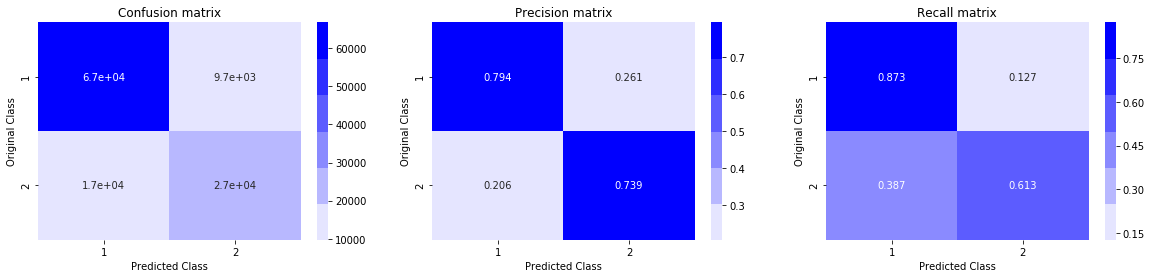

In [144]:
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<a id='con'></a>
## 5. Conclusion :

Model         | Train Log loss |  Test Log loss 
----------------------|-----------|------------
 Logistic Regression   |  0.440  |    0.439   
 Linear SVM  | 0.440  |    0.439
 Naive Bayes |0.540 |0.549
 XGBoost    |      0.306    |    0.325       
 

- Of all the models that I have trained, XGBoost gives the best performance.
